In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Загрузите данные за май 2016 года:

In [2]:
#чтение данных из файла за май 2016 года
data = pd.read_csv('yellow_tripdata_2016-05.csv')

## 2. Проведите фильтрацию:

In [3]:
#фильтрация данных по условиям:
#     - нулевой длительностью
#     - нулевым количеством пассажиров
#     - нулевым расстоянием поездки по счётчику
#     - координатами начала, не попадающими в прямоугольник Нью-Йорка

data_d = (data.loc[(data['trip_distance']> 0) & (data['passenger_count']> 0) & 
                   (data['tpep_pickup_datetime']!=data['tpep_dropoff_datetime']) & 
                  (data['pickup_longitude'] > -74.25559) & (data['pickup_longitude'] < -73.70001) &
                  (data['pickup_latitude'] > 40.49612) & (data['pickup_latitude'] < 40.91553)]).reset_index(drop=True)
# удаление исходных данных из памяти
del data

## 3. Агрегируйте данные за май 2016 года по часам и областям:

In [4]:
#чтение данных по номерам ячеек по координатам
reg = pd.read_csv('regions.csv', sep = ';')

# вспомогательные данные для расчета номера ячейки.
sn = reg[['south','north']].drop_duplicates(subset=['south','north']).reset_index(drop=True)
we = reg[['west','east']].drop_duplicates(subset=['west','east']).reset_index(drop=True)
min_r_sn = min(sn.north.min(), sn.south.min())
d_sn = sn.north[0] - sn.south[0]
min_r_we = min(we.west.min(), we.east.min())
d_sn_we = we.east[0] - we.west[0]

#добавляется информация по номерам ячеек
data_d['reg'] = (data_d['pickup_longitude']-min_r_we)//d_sn_we*50+(data_d['pickup_latitude']-min_r_sn)//d_sn+1

#удаление исходных данных из памяти
del reg

# округление времени до часа
data_d['time'] = pd.to_datetime(data_d.tpep_pickup_datetime, format='%Y-%m-%d').dt.floor("H")
#data_d['time_new'] = pd.to_datetime(data_d.tpep_pickup_datetime, format='%Y-%m-%d %H:%M:%S')

#создается новый dataframe только с информацией по номерам ячеек, времени 
#и каждой поездке присваивается счетчик поездок = 1, для дальнейшего свода
data_3 = data_d[['reg','time']]
data_3['count'] = 1.0

#удаление временных данных из памяти
del data_d

#создается фиктивный dataframe для того, чтобы добавить отсутствующие ячейки. 
#В этом dataframe каждой поездке присваивается счетчик поездок = 0 и временное значение temp в поле time
data_other = pd.DataFrame(columns = ['reg','time', 'count'])
for i in range(1,2501,1):
    data_other = data_other.append(pd.DataFrame({'reg': i, 'time': 'temp', 'count':0}, index=[i]))

#объединение данных для дальнейшего свода
data_new = pd.concat([data_3,data_other])

#удаление временных данных из памяти
del data_3
del data_other

#формирование сводных данных
data_svod = data_new.pivot_table(index='reg', columns='time', aggfunc=sum, fill_value = 0)

#удаление колонки с временным значением
del data_svod['count', 'temp']
#удаление временных данных из памяти
del data_new
#a.loc[:, ['count','time']]

C:\Users\21542\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 4. Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок:

In [5]:
pd.set_option('display.max_columns', 744)
data_svod.head()

count                                          \
time 2016-05-01 00:00:00 2016-05-01 01:00:00 2016-05-01 02:00:00   
reg                                                                
1.0                    0                   0                   0   
2.0                    0                   0                   0   
3.0                    0                   0                   0   
4.0                    0                   0                   0   
5.0                    0                   0                   0   

                                                                  \
time 2016-05-01 03:00:00 2016-05-01 04:00:00 2016-05-01 05:00:00   
reg                                                                
1.0                    0                   0                   0   
2.0                    0                   0                   0   
3.0                    0                   0                   0   
4.0                    0                   0                   0   
5.0                    0                   0                   0   

                                                                  \
time 2016-05-01 06:00:00 2016-05-01 07:00:00 2016-05-01 08:00:00   
reg                                                                
1.0                    0                   0                   0   
2.0                    0                   0                   0   
3.0                    0                   0                   0   
4.0                    0                   0                   0   
5.0                    0                   0                   0   

                                                                  \
time 2016-05-01 09:00:00 2016-05-01 10:00:00 2016-05-01 11:00:00   
reg                                                                
1.0                    0                   0                   0   
2.0                    0                   0                   0   
3.0                    0                   0                   0   
4.0                    0                   0                   0   
5.0                    0                   0                   0   

                                                                  \
time 2016-05-01 12:00:00 2016-05-01 13:00:00 2016-05-01 14:00:00   
reg                                                                
1.0                    0                   0                   0   
2.0                    0                   0                   0   
3.0                    0                   0                   0   
4.0                    0                   0                   0   
5.0                    0                   0                   0   

                                                                  \
time 2016-05-01 15:00:00 2016-05-01 16:00:00 2016-05-01 17:00:00   
reg                                                                
1.0                    0                   0                   0   
2.0                    0                   0                   0   
3.0                    0                   0                   0   
4.0                    0                   0                   0   
5.0                    0                   0                   0   

                                                                  \
time 2016-05-01 18:00:00 2016-05-01 19:00:00 2016-05-01 20:00:00   
reg                                                                
1.0                    0                   0                   0   
2.0                    0                   0                   0   
3.0                    0                   0                   0   
4.0                    0                   0                   0   
5.0                    0                   0                   0   

                                                                  \
time 2016-05-01 21:00:00 2016-05-01 22:00:00 2016-05-01 23:00:00   
reg                                                                


## 5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building:

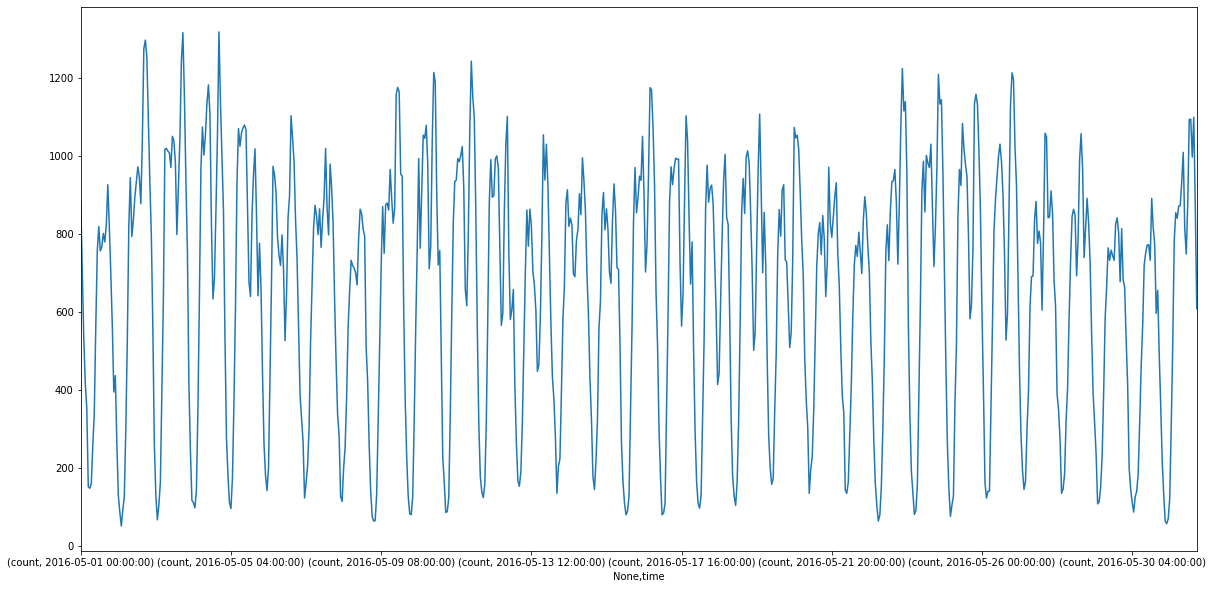

In [6]:
#координаты Empire State Building.
empire_s_b = [-73.9856613, 40.748524] 

#расчет номера ячейки для Empire State Building
empire_s_b_region = (empire_s_b[0]-min_r_we)//d_sn_we*50+(empire_s_b[1]-min_r_sn)//d_sn+1

#вывод графика поездки
fig, axes = plt.subplots(figsize=(20,10))
data_svod.loc[empire_s_b_region, ['count','time']].plot()

## 6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки:

In [7]:
# количество пустых значений(час - ячейка)
sum((data_svod == 0).sum())

1718238

## 7. Для следующих заданий экспорт данных

In [40]:
sum_reg = []
for i in range (1,2501,1):
    sum_reg.append(data_svod.loc[i, ['count','time']].sum())

In [43]:
my_df = pd.DataFrame(sum_reg)
my_df.to_csv('sum_reg.csv')